<a href="https://colab.research.google.com/github/Arseniy16/Computational_Math/blob/main/Lab1_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 1.
**Численное дифференцирование**
---

Написать программу для численного дифференцирования сеточной
функции. Предусмотреть возможность аппроксимации первой и второй
производных с первым и вторым порядками.

Протестировать работу программы на заранее выбранной гладкой
функции. Сравнить результаты численного дифференцирования с проекциями производных тестовой функции на расчетную сетку. Построить
графики зависимости погрешности аппроксимации от шага сетки в логарифмическом масштабе. Оценить фактические порядки аппроксимации,
основываясь на полученных графиках.

---

Рассмотрим функцию $f(x) = -x+3x^2-x^3 + x^4 $.

Построим данную функцию задав на интервале $[-10, 10]$ c количеством точек = count.

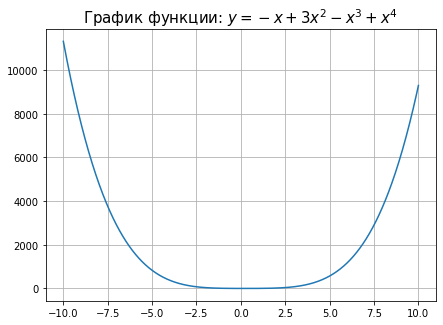

In [ ]:
from pickle import TRUE
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

count = 1000

x = np.linspace(-10, 10, count) 

func = lambda x: -x+3*x**2-x**3 + x**4

fig, ax = plt.subplots(figsize = (7, 5))
ax.grid(TRUE)

ax.plot(x, func(x))

ax.set_title('График функции: $y = -x + 3x^2 - x^3 + x^4 $', fontsize=15)

plt.show()



> * Метод правой разницы для вычисления производной:
$$
    y'_x \approx \frac {y_{i+1} - y_{i}} {x_{i+1} - x_{i}} \\  
    y' _{x_n} = y' _{x_{n-1}}
$$

> * Метод левой разницы для вычисления производной:
$$
    y'_x \approx \frac {y_{i} - y_{i-1}} {x_{i} - x_{i-1}} \\
    y' _{x_0} = y' _{x_{1}}
$$

> * Метод центральной разности для вычисления производной:
$$
    y'_x \approx \frac {y_{i+1} - y_{i-1}} {x_{i+1} - x_{i-1}} \\
    y' _{x_0} = \frac {-3 y_{x_0} + 4 y_{x_1} - y _{x_2}} {2h} \\
    y' _{x_{n-1}} = \frac {3 y_{x_{n-1}} - 4 y_{x_{n-2}} + y _{x_{n-3}}} {2h}
$$
 

Производная исходной функции: 
$f'_x = -1 + 6x - 3x^2 + 4x^3$

Рассмотрим метод правой и левой разницы для численного дифференцирования функции.

Для численного дифференцирования функции, возьмём также промежуток $[-10, 10]$ с шагом $h$.

Построим график первой производной исходной функции и графики, исходя из методов. 

In [ ]:
func_diff = lambda x: -1 + 6*x - 3*x**2 + 4*x**3

h = 1

x_new = np.arange(-10, 10.01, h)
# print(x_new)

def diff_function(x_new, h, function):

    func = function(x_new)
    # print(func)

    diff_left = [(func[i] - func[i-1]) / h for i in range(1, len(func))]
    diff_right = [(func[i+1] - func[i]) / h for i in range(0, len(func)-1)]


    diff_left = np.insert(diff_left, 0, diff_left[0])
    diff_right = np.append(diff_right, diff_right[-1])

    diff_center_temp = [(func[i+1] - func[i-1]) / (2*h) for i in range(1, len(func)-1)]

    temp = np.insert(diff_center_temp, 0, (-3*func[0] + 4*func[1] - func[2]) / (2*h) )
    diff_center = np.append(temp,  (3*func[-1] - 4*func[-2] + func[-3]) / (2*h) )

    return diff_left, diff_right, diff_center


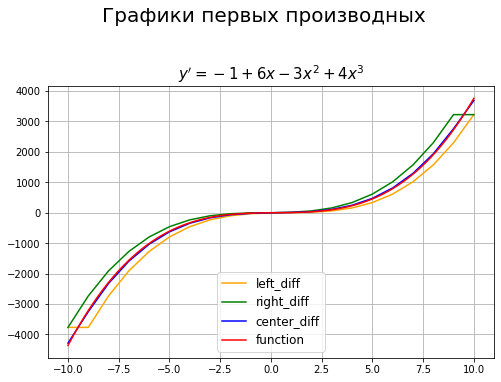

In [ ]:
diff = diff_function(x_new, h, func)

fig, ax = plt.subplots(figsize = (8, 5))

fig.suptitle('Графики первых производных', y = 1.1, fontsize = 20)

ax.grid(TRUE)
ax.plot(x_new, diff[0], color='orange', label='left_diff')
ax.plot(x_new, diff[1], color='green', label='right_diff')
ax.plot(x_new, diff[2], color='blue', label='center_diff')
ax.plot(x, func_diff(x), color='red', label='function')
ax.legend(loc='lower center', fontsize='large')

ax.set_title('$y\' = -1 + 6x - 3 x^2 + 4 x^3$', loc='center', fontsize=15)

plt.show()

Оценим погрешности для метода правой разницы (метод аппроксимации первой производной первого порядка):

$$
\Delta_1 = M_2 \frac{h}{2} + \frac{2 \delta}{h}
$$

А также для метода центральной разницы (метод аппроксимации первой производной второго порядка):

$$
\Delta_2 = M_3 \frac{h^2}{6} + \frac{\delta}{h}
$$


Построим графики погрешности первой производной функции от шага $h$ для каждого из методов (также и в логарифмичеком масштабе)

In [ ]:
count = 50

h_arr = np.linspace(1e-7, 1e-1, count)

In [ ]:
def error_of_methods(count, h_arr, func, diff_func):

    delta_1_arr = [] # for right method
    delta_2_arr = [] # for center method

    for h_i in h_arr:
        x_arr = np.arange((-count/2) * h_i, (count/2) * h_i, h_i)
        # print(count)
        # print(x_arr)

        diff_left, diff_right, diff_center = diff_function(x_arr, h_i, func)

        diff_func_new = diff_func(x_arr)

        delta_1_arr.append(np.sum(np.abs(diff_func_new - diff_right)) ) 
        delta_2_arr.append(np.sum(np.abs(diff_func_new - diff_center)) )

    # print(delta_1_arr)
        
    return delta_1_arr, delta_2_arr


In [ ]:
delta_func = error_of_methods(count, h_arr, func, func_diff)

In [ ]:
def plot_error_func(delta_func, h_arr, title, text = 'первой'):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 7))

    fig.suptitle(title, fontsize = 15, y = 1.1, fontweight='bold')

    ax1.scatter(h_arr, delta_func[0], color='green', label='погрешность метода аппроксимации первого порядка')
    ax1.scatter(h_arr, delta_func[1], color='blue', label='погрешность метода аппроксимации второго порядка')

    ax2.scatter(np.log(h_arr), np.log(delta_func[0]), color='green', label='погрешность метода аппроксимации первого порядка')
    ax2.scatter(np.log(h_arr), np.log(delta_func[1]), color='blue', label='погрешность метода аппроксимации второго порядка')

    ax1.legend(loc='upper center', fontsize='large')
    ax2.legend(loc='upper center', fontsize='large')

    ax1.grid(TRUE)
    ax2.grid(TRUE)

    ax1.set_title('График зависимости погрешности\n' + text + ' производной функции от шага h', loc='center', fontsize=15)
    ax1.set_xlabel('шаг - h', fontsize=13)
    ax1.set_ylabel('Погрешность - $\epsilon$', fontsize=13)

    ax2.set_title('График логарифмической зависимости погрешности\n' + text + ' производной функции от шага h', loc='center', fontsize=15)
    ax2.set_xlabel('шаг - $\ln{h}$', fontsize=13)
    ax2.set_ylabel('Погрешность - $\ln{\epsilon}$', fontsize=13)

    plt.show()

    return

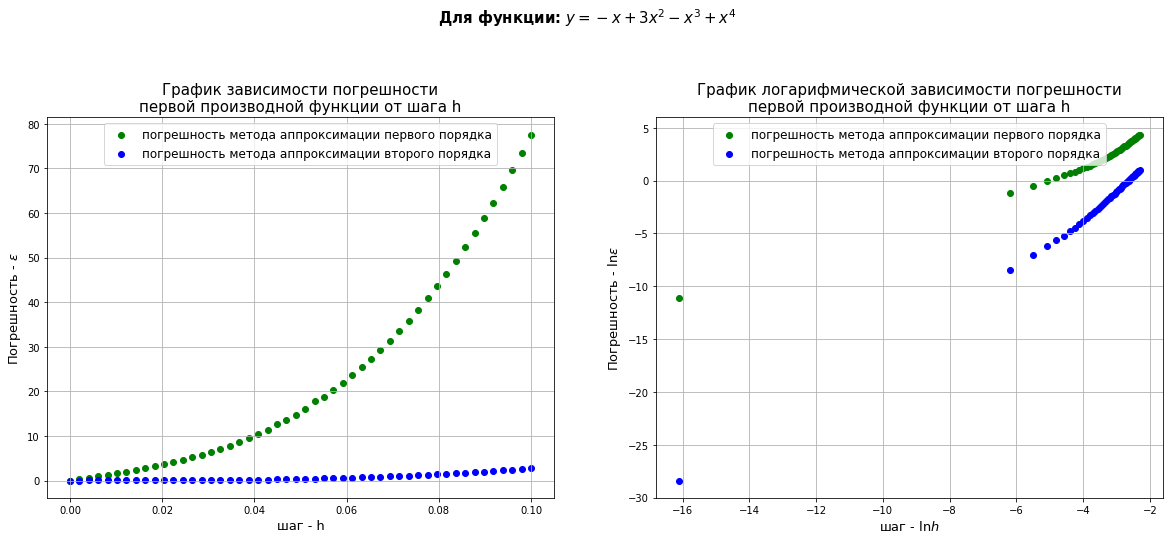

In [ ]:
title = 'Для функции: $y = -x + 3x^2 - x^3 + x^4$'

plot_error_func(delta_func, h_arr, title)

In [ ]:
from scipy.stats import linregress

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(np.log(h_arr), np.log(delta_func[0]))
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(np.log(h_arr), np.log(delta_func[1]))
print('k1(right_diff) = ', slope1)
print('k2(central_diff) = ', slope2)

k1(right_diff) =  1.1469872825674143
k2(central_diff) =  2.1711670129483465


Как видим, $k1 ≈ 1$ и $k2 ≈ 2$, что соответсвует первому и второму порядку аппроксимации соответственно.


---



Вторая производная исходной функции: 
$f''_x = 6 - 6x + 12x^2$

> * Метод аппроксимации первого порядка для вычисления второй производной функции:
    
$$
    y''_i = \frac{y_{i-1} - 2 y_i + y_{i+1} }{h^2} \\
    y''_0 = \frac{y_0 - 2 y_1 + y_2}{h^2} \\
    y''_n = \frac{y_{n-2} - 2 y_{n-1} + y_{n}}{h^2}
$$

> * Метод аппроксимации второго порядка для вычисления второй производной функции:
$$
    y''_i = \frac{y_{i-1} - 2 y_i + y_{i+1} }{h^2} \\
    y''_0 = \frac{2 y_0 - 5 y_1 + 4 y_2 - y_3}{h^2} \\
    y''_n= \frac{-y_{n-3} + 4 y_{n-2} - 5 y_{n-1} + 2 y_n}{h^2}
$$


---

Построим график зависимости второй производной функции. 

Также построим графики вторых производных исходя из численных методов с некоторым шагом $h$.


In [ ]:
#NEW VERSION

func_diff_diff = lambda x: 6 - 6*x + 12*x**2

def diff_2_function(x_new, h, function):
    func = function(x_new)

    diff_diff_first = [(func[i+1] - 2*func[i] + func[i-1]) / (h**2) for i in range(1, len(func)-1)] # for the first method approximation
    diff_diff_second = diff_diff_first # for the second method approximation

    temp = np.insert(diff_diff_first, 0, (func[0] - 2*func[1] + func[2]) / (h**2) ) 
    diff_diff_first = np.append(temp, (func[-3]- 2*func[-2] + func[-1]) / (h**2) ) 

    temp = np.insert(diff_diff_second, 0, (2*func[0] - 5*func[1] + 4*func[2] - func[3]) / (h**2) ) 
    diff_diff_second = np.append(temp, (-func[-4] + 4*func[-3] - 5*func[-2] + 2*func[-1]) / (h**2) )

    return diff_diff_first, diff_diff_second


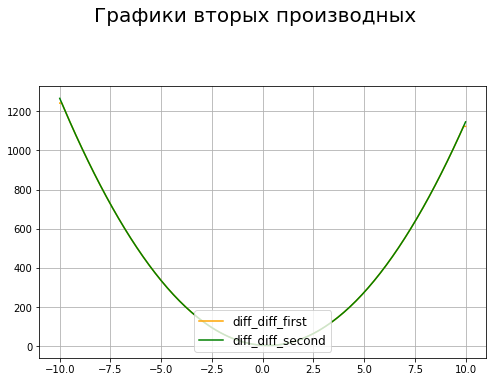

In [ ]:
h = 0.1
x_new = np.arange(-10, 10.01, h)

diff_diff = diff_2_function(x_new, h, func)

fig, ax = plt.subplots(figsize = (8, 5))

fig.suptitle('Графики вторых производных', y = 1.1, fontsize = 20)

ax.grid(TRUE)
ax.plot(x_new, diff_diff[0], color='orange', label='diff_diff_first')
ax.plot(x_new, diff_diff[1], color='green', label='diff_diff_second')
# ax.plot(x, func_diff_diff(x), color='red', label='diff_diff_func')
ax.legend(loc='lower center', fontsize='large')

# ax.set_title('$y\' = -1 + 6x - 3 x^2$', loc='center', fontsize=15)

plt.show()

In [ ]:
def error_diff_diff(count, h_arr, func, diff_diff_func):

    delta_1_arr = [] # for the first method
    delta_2_arr = [] # for the second method

    for h_i in h_arr:
        x_arr = np.arange(-count/2 * h_i, count/2 * h_i, h_i)
        
        diff_diff_first, diff_diff_second = diff_2_function(x_arr, h_i, func)
        
        # print(diff_diff_first)

        diff_diff_func_new = diff_diff_func(x_arr)

        delta_1_arr.append(np.max(np.abs(diff_diff_func_new - diff_diff_first)) ) 
        delta_2_arr.append(np.max(np.abs(diff_diff_func_new - diff_diff_second)) )

        # print(delta_2_arr)

    return delta_1_arr, delta_2_arr



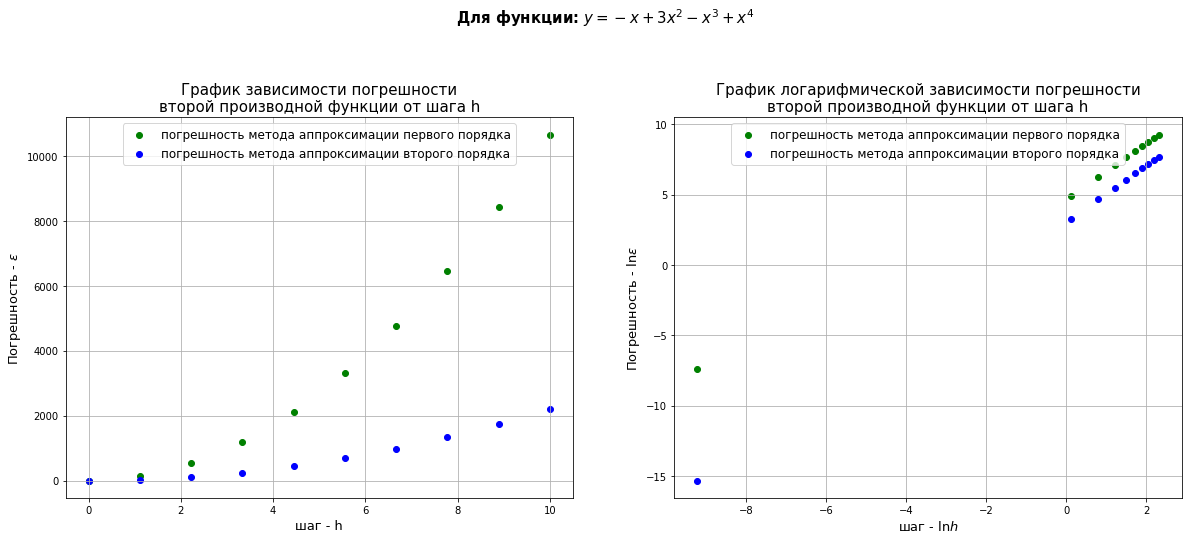

In [ ]:
count = 10
np.seterr(divide = 'ignore')

h_arr = np.linspace(1e-4, 10, count)

delta_func = error_diff_diff(count, h_arr, func, func_diff_diff)

plot_error_func(delta_func, h_arr, title, text = 'второй')

# plot_error_func(delta_func, func,)

In [ ]:
from scipy.stats import linregress

# mask = ~np.isnan(np.log(h_arr)) & ~np.isnan(np.log(delta_func[1]))

#  = x[~numpy.isnan(x)]

# print(np.log(delta_func[1]))
t = [i for i, v in enumerate(delta_func[1]) if v == 0]
print(t)

# new_delta = np.delete(delta_func[1], t)
# new_h_arr = np.delete(h_arr, t) 

# print(new)
# temp = np.where(delta_func[0] < 0, delta_func[0], 'F')
# print(temp)

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(np.log(h_arr), np.log(delta_func[0]))
# slope2, intercept2, r_value2, p_value2, std_err2 = linregress(np.log(new_h_arr), np.log(new_delta))
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(np.log(h_arr)[1:], np.log(delta_func[1][1:]))

print('k1 = ', slope1 - 0.43)
print('k2 = ', slope2)

# [i for i in delta_func[1] if i > 0 ]

[]
k1 =  1.0028809725065073
k2 =  1.9999999999999996
